In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("D:\PGDBA Backup\ISI\AB-Inference\Assignments\Datasets\Effort and Arrival.xlsx")

In [3]:
df.head()

,Job Level of the employee,# of years of experience,ITILProcessType,Complexity,Effort,Service Domain type
0,3,0.72,Release Management,Medium,55,App suport
1,3,0.72,Release Management,Medium,55,App suport
2,3,2.75,Service Request,Medium,72,Database Support
3,3,0.72,Release Management,Medium,55,App suport
4,3,0.72,Release Management,Medium,55,App suport


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Level of the employee  6460 non-null   int64  
 1   # of years of experience   6447 non-null   float64
 2   ITILProcessType            6460 non-null   object 
 3   Complexity                 6460 non-null   object 
 4   Effort                     6460 non-null   int64  
 5   Service Domain type        6460 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 302.9+ KB


In [5]:
df.describe()

,Job Level of the employee,# of years of experience,Effort
count,6460.000000,6447.000000,6460.000000
mean,3.107121,2.542984,81.263777
std,0.518712,1.738865,84.607490
min,2.000000,0.720000,1.000000
25%,3.000000,1.230000,30.000000
50%,3.000000,2.060000,52.000000
75%,3.000000,3.380000,103.000000
max,5.000000,11.760000,646.000000


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='ITILProcessType', ylabel='Effort'>

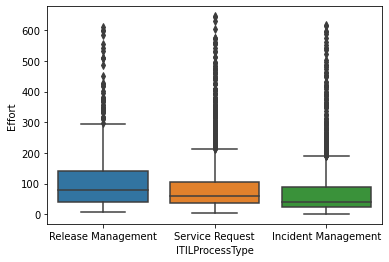

In [7]:
sns.boxplot(data = df,x="ITILProcessType", y="Effort")

<AxesSubplot:xlabel='Complexity', ylabel='Effort'>

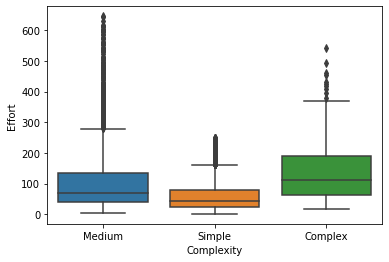

In [8]:
sns.boxplot(data = df,x="Complexity", y="Effort")

<AxesSubplot:>

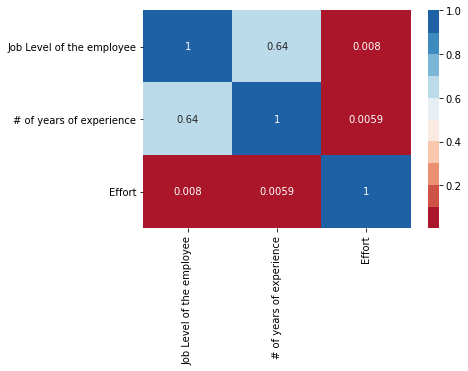

In [9]:
sns.heatmap(df.corr(), cmap=sns.color_palette("RdBu", 10), annot=True)

In [10]:
import matplotlib.pyplot as plt

# Sampling Data

In [11]:
df_simple = df[df.Complexity == "Simple"]

In [12]:
df_simple.head()

,Job Level of the employee,# of years of experience,ITILProcessType,Complexity,Effort,Service Domain type
6,3,1.31,Incident Management,Simple,12,Database Support
8,3,1.21,Service Request,Simple,50,App suport
9,3,1.48,Service Request,Simple,140,Database Support
12,3,0.75,Service Request,Simple,103,App suport
14,4,3.74,Service Request,Simple,98,Database Support


In [13]:
df_simple.describe()

,Job Level of the employee,# of years of experience,Effort
count,4026.000000,4016.000000,4026.000000
mean,3.113512,2.426701,62.368604
std,0.460927,1.727299,53.707732
min,2.000000,0.720000,1.000000
25%,3.000000,1.210000,25.000000
50%,3.000000,2.040000,42.000000
75%,3.000000,3.300000,80.000000
max,5.000000,8.080000,250.000000


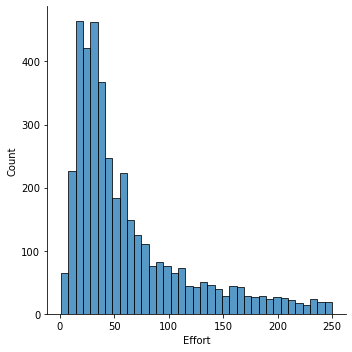

In [14]:
sns.displot(data=df_simple, x="Effort")

In [15]:
q5_simple=df_simple.Effort.quantile(q=0.05, interpolation='linear')
print(q5_simple)

12.0


In [16]:
q95_simple=df_simple.Effort.quantile(q=0.95, interpolation='linear')
print(q95_simple)

187.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df_simple, test_size=0.25, random_state =1)

In [19]:
train.describe()

,Job Level of the employee,# of years of experience,Effort
count,3019.000000,3013.000000,3019.000000
mean,3.113283,2.428506,62.824114
std,0.458069,1.721907,54.096273
min,2.000000,0.720000,1.000000
25%,3.000000,1.210000,25.000000
50%,3.000000,2.040000,42.000000
75%,3.000000,3.300000,81.000000
max,5.000000,8.080000,250.000000


In [20]:
q5=train.Effort.quantile(q=0.05, interpolation='linear')
print(q5)

12.0


In [21]:
q95=train.Effort.quantile(q=0.95, interpolation='linear')
print(q95)

187.0


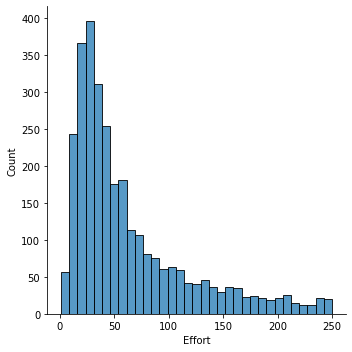

In [22]:
sns.displot(data=train, x="Effort")

In [23]:
test.describe()

,Job Level of the employee,# of years of experience,Effort
count,1007.000000,1003.000000,1007.000000
mean,3.114201,2.421276,61.002979
std,0.469621,1.744247,52.528464
min,2.000000,0.720000,1.000000
25%,3.000000,1.210000,25.000000
50%,3.000000,1.690000,40.000000
75%,3.000000,3.300000,78.000000
max,5.000000,7.450000,247.000000


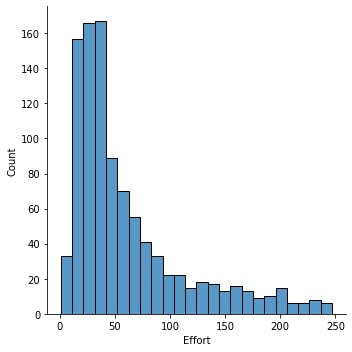

In [24]:
sns.displot(data=test, x="Effort")

In [25]:
test_falling_in_range = test[(test.Effort >= q5) & (test.Effort <= q95)]

In [26]:
test_falling_in_range.head()

,Job Level of the employee,# of years of experience,ITILProcessType,Complexity,Effort,Service Domain type
958,3,2.19,Service Request,Simple,17,App suport
4511,2,1.81,Service Request,Simple,65,Database Support
3397,3,1.41,Incident Management,Simple,20,Database Support
1621,3,0.73,Incident Management,Simple,32,Database Support
5324,4,7.45,Service Request,Simple,29,Database Support


In [27]:
test_falling_in_range.describe()

,Job Level of the employee,# of years of experience,Effort
count,926.000000,923.000000,926.000000
mean,3.107991,2.411354,55.041037
std,0.475566,1.748024,40.632572
min,2.000000,0.720000,12.000000
25%,3.000000,1.210000,25.000000
50%,3.000000,1.690000,40.000000
75%,3.000000,3.300000,70.000000
max,5.000000,7.450000,187.000000


In [28]:
ratio_falling = len(test_falling_in_range.index)/len(test.index)

print(ratio_falling)

0.9195630585898709
